<a href="https://colab.research.google.com/github/Ahxhan/Energy-Efficiency-Analysis/blob/main/energy_eficiency.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
install.packages (c("RCurl", "rio"))

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘R.oo’, ‘R.methodsS3’, ‘bitops’, ‘writexl’, ‘R.utils’




In [ ]:
library(RCurl)
url <- "https://raw.githubusercontent.com/Ahxhan/Energy-Efficiency-Analysis/main/Energy_dataset.csv"
data <- getURL(url)
energy_data <- read.csv (text = data)
head(energy_data)

,Relative.Compactness,Surface.Area,Wall.Area,Roof.Area,Overall.Height,Orientation,Glazing.Area,Glazing.Area.Distribution,Heating.Load,Cooling.Load
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<int>,<dbl>,<dbl>
1,0.98,514.5,294.0,110.25,7,2,0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7,3,0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7,4,0,0,15.55,21.33
4,0.98,514.5,294.0,110.25,7,5,0,0,15.55,21.33
5,0.90,563.5,318.5,122.50,7,2,0,0,20.84,28.28
6,0.90,563.5,318.5,122.50,7,3,0,0,21.46,25.38


In [ ]:
install.packages('sqldf')
library(sqldf)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘plogr’, ‘gsubfn’, ‘proto’, ‘RSQLite’, ‘chron’


Loading required package: gsubfn

Loading required package: proto

Warning message:
“no DISPLAY variable so Tk is not available”
Loading required package: RSQLite



In [ ]:
sql_execution <- sqldf("SELECT * FROM energy_data")
print(sql_execution)

    Relative.Compactness Surface.Area Wall.Area Roof.Area Overall.Height
1                   0.98        514.5     294.0    110.25            7.0
2                   0.98        514.5     294.0    110.25            7.0
3                   0.98        514.5     294.0    110.25            7.0
4                   0.98        514.5     294.0    110.25            7.0
5                   0.90        563.5     318.5    122.50            7.0
6                   0.90        563.5     318.5    122.50            7.0
7                   0.90        563.5     318.5    122.50            7.0
8                   0.90        563.5     318.5    122.50            7.0
9                   0.86        588.0     294.0    147.00            7.0
10                  0.86        588.0     294.0    147.00            7.0
11                  0.86        588.0     294.0    147.00            7.0
12                  0.86        588.0     294.0    147.00            7.0
13                  0.82        612.5     318.5    

In [ ]:
selection_query <- sqldf("SELECT * FROM energy_data
                          WHERE 'Relative_Compactness' > 0.5
                          ORDER BY 'Relative_Compactness'
                          DESC LIMIT 10")
print(selection_query)

   Relative.Compactness Surface.Area Wall.Area Roof.Area Overall.Height
1                  0.98        514.5     294.0    110.25              7
2                  0.98        514.5     294.0    110.25              7
3                  0.98        514.5     294.0    110.25              7
4                  0.98        514.5     294.0    110.25              7
5                  0.90        563.5     318.5    122.50              7
6                  0.90        563.5     318.5    122.50              7
7                  0.90        563.5     318.5    122.50              7
8                  0.90        563.5     318.5    122.50              7
9                  0.86        588.0     294.0    147.00              7
10                 0.86        588.0     294.0    147.00              7
   Orientation Glazing.Area Glazing.Area.Distribution Heating.Load Cooling.Load
1            2            0                         0        15.55        21.33
2            3            0                     

In [ ]:
# Create a data frame for the new row
new_row <- data.frame(X1=0.8, X2=700, X3=250, X4=110, X5=3.5, X6=4, X7=0.3, X8=4, Y1=18, Y2=22)
# Append the new row to the original data using rbind
data <- rbind(data, new_row)

# Verify the new row was added
print(tail(data))

In [ ]:
data <- sqldf("UPDATE data SET X2 = 750 WHERE X1 = 0.8")

# Verify the update
updated_row <- sqldf("SELECT * FROM data WHERE X1 = 0.8")
print(updated_row)

In [ ]:
data <- sqldf("DELETE FROM data WHERE X1 = 0.8")

# Verify the deletion
deleted_row_check <- sqldf("SELECT * FROM data WHERE X1 = 0.8")
print(deleted_row_check)

In [ ]:
result_avg_heating_load <- sqldf("SELECT AVG('Heating.Load') AS Avg_Heating_Load FROM energy_data")
print(result_avg_heating_load)

  Avg_Heating_Load
1          22.3072


In [ ]:
total_cooling_load <- sqldf("SELECT SUM(`Cooling.Load`) AS Total_Cooling_Load FROM energy_data")
print(total_cooling_load)

  Total_Cooling_Load
1            18883.4


In [ ]:
result_avg_loads_height <- sqldf("SELECT `Overall.Height`, AVG(`Heating.Load`) as AvgHeatingLoad,
                                  AVG(`Cooling.Load`) as AvgCoolingLoad
                                  FROM energy_data GROUP BY `Overall.Height`")
print(result_avg_loads_height)


  Overall.Height AvgHeatingLoad AvgCoolingLoad
1            3.5       13.33852       16.07143
2            7.0       31.27589       33.10409


In [ ]:
result_max_heating_load <- sqldf("SELECT MAX('') AS Max_Heating_Load FROM energy_data")
print(result_max_heating_load)


  Max_Heating_Load
1     Heating_Load


In [ ]:
Example_2 <- sqldf("SELECT Orientation, AVG(`Cooling.Load`) as AvgCoolingLoad FROM energy_data GROUP BY Orientation")
print(Example_2)

  Orientation AvgCoolingLoad
1           2       24.60453
2           3       24.31255
3           4       24.48031
4           5       24.95365


In [ ]:
result_total_heating_wall_area <- sqldf("SELECT SUM(`Heating.Load`) AS Total_Heating_Load
                                         FROM energy_data
                                         WHERE `Wall.Area` BETWEEN 200 AND 300")
print(result_total_heating_wall_area)


  Total_Heating_Load
1            5920.94


In [ ]:
install.packages('dplyr')
library(dplyr)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
filtered_data <- energy_data %>% filter(`Cooling.Load` > 50)
print(filtered_data)


ERROR: Error in energy_data %>% filter(Cooling.Load > 50): could not find function "%>%"


In [ ]:
summary_data <- energy_data %>%
  group_by(`Orientation`) %>%
  summarize(
    Avg_Heating_Load = mean(`Heating.Load`, na.rm = TRUE),
    Avg_Cooling_Load = mean(`Cooling.Load`, na.rm = TRUE)
  )

print(summary_data)


# A tibble: 4 × 3
  Orientation Avg_Heating_Load Avg_Cooling_Load
        <int>            <dbl>            <dbl>
1           2             22.3             24.6
2           3             22.4             24.3
3           4             22.3             24.5
4           5             22.3             25.0


In [ ]:
summary_data <- energy_data %>%
  group_by(`Orientation`) %>%
  summarize(
    Avg_Heating_Load = mean(`Heating.Load`),
    Avg_Cooling_Load = mean(`Cooling.Load`)
  )
print(summary_data)


# A tibble: 4 × 3
  Orientation Avg_Heating_Load Avg_Cooling_Load
        <int>            <dbl>            <dbl>
1           2             22.3             24.6
2           3             22.4             24.3
3           4             22.3             24.5
4           5             22.3             25.0


In [ ]:
median_heating_load <- median(energy_data$Heating.Load, na.rm = TRUE)
# Add a new column to indicate whether Heating Load is above the median
energy_data <- energy_data %>%
  mutate(Above_Median_Heating = ifelse(Heating.Load > median_heating_load, TRUE, FALSE))
#print first 10 output
print(head(energy_data, 10))


   Relative.Compactness Surface.Area Wall.Area Roof.Area Overall.Height
1                  0.98        514.5     294.0    110.25              7
2                  0.98        514.5     294.0    110.25              7
3                  0.98        514.5     294.0    110.25              7
4                  0.98        514.5     294.0    110.25              7
5                  0.90        563.5     318.5    122.50              7
6                  0.90        563.5     318.5    122.50              7
7                  0.90        563.5     318.5    122.50              7
8                  0.90        563.5     318.5    122.50              7
9                  0.86        588.0     294.0    147.00              7
10                 0.86        588.0     294.0    147.00              7
   Orientation Glazing.Area Glazing.Area.Distribution Heating.Load Cooling.Load
1            2            0                         0        15.55        21.33
2            3            0                     

In [ ]:
install.packages("ggplot2")


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(ggplot2)

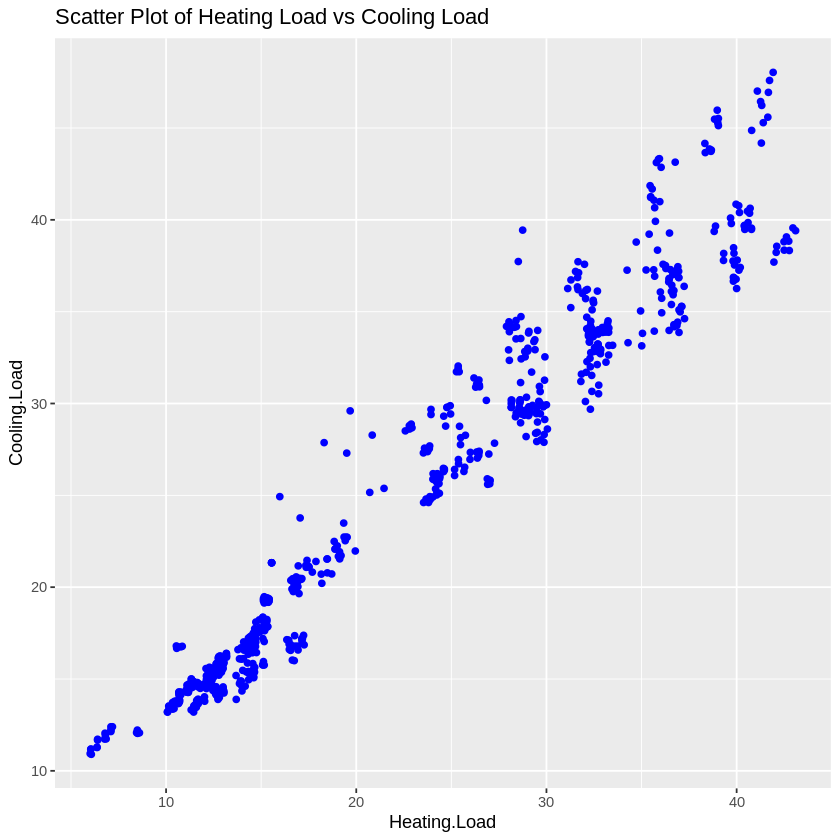

In [ ]:
ggplot(data = energy_data, aes(x = Heating.Load, y = Cooling.Load)) +
  geom_point(color = 'blue') +
  labs(title = "Scatter Plot of Heating Load vs Cooling Load",
       x = "Heating.Load",
       y = "Cooling.Load")

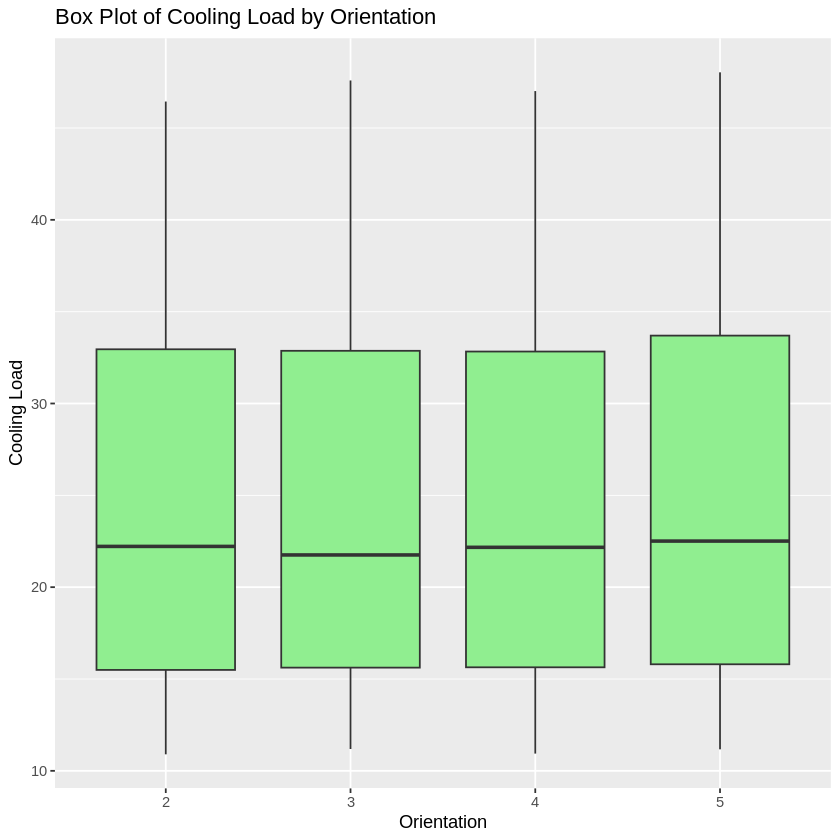

In [ ]:
ggplot(data = energy_data, aes(x = factor(Orientation), y = Cooling.Load)) +
  geom_boxplot(fill = 'lightgreen') +
  labs(title = "Box Plot of Cooling Load by Orientation",
       x = "Orientation",
       y = "Cooling Load")


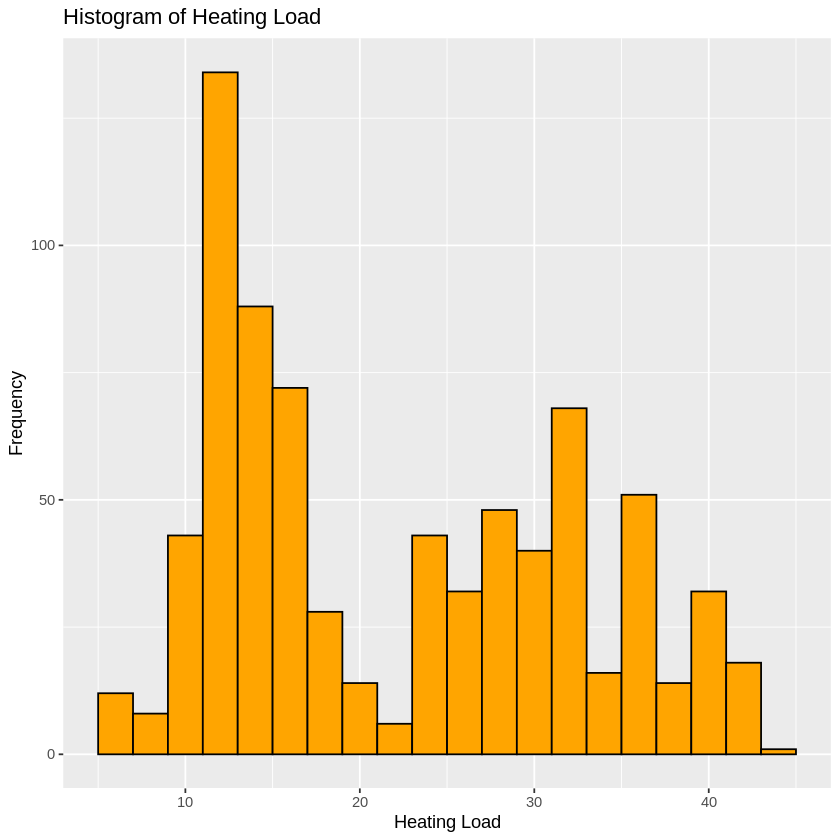

In [ ]:
ggplot(data = energy_data, aes(x = Heating.Load)) +
  geom_histogram(binwidth = 2, fill = 'orange', color = 'black') +
  labs(title = "Histogram of Heating Load",
       x = "Heating Load",
       y = "Frequency")
